In [31]:
# Sam Brown
# Sam_brown@mines.edu
# June 24
# Goal: Gradient boost to predict slip size, XGboost

import sys
sys.path.append("/Users/sambrown04/Documents/SURF/whillans-surf/notebooks/SURF")

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/Users/sambrown04/Documents/SURF/Preproc_data/averages_events_2011-13.csv", parse_dates=["start_time"])
df = df.iloc[1:] # Cut off 

In [21]:
# Predictors and target
X = df[[ 'tide_height', 'tide_change', 'mins_since', 'h_event']]
y = df['total_delta'].values.reshape(-1,1)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [23]:
# Model

xgb = XGBRegressor(
    n_estimators = 100,
    learning_rate = .1,
    max_depth = 3,
    subsample=.8,
    colsample_bytree=1,
    random_state = 42
)

In [25]:
# Train
xgb.fit(X_train, y_train)

# Predict
y_pred = xgb.predict(X_test)

#Eval
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

RMSE: 0.0213
R2 Score: 0.9164


In [27]:
# Tune
param_grid = {
    'n_estimators': [100,200],
    'max_depth':[3,5,7],
    'learning_rate': [.01, .1],
    'subsample':[.8,1.0],
    'colsample_bytree':[.8,1.0]
}

grid_search = GridSearchCV(
    estimator = XGBRegressor(random_state=42),
    param_grid = param_grid,
    scoring='neg_mean_squared_error',
    cv = 3,
    verbose = 1,
    n_jobs = 1
)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


       Feature  Importance
2   mins_since    0.879300
0  tide_height    0.091523
1  tide_change    0.029177
3      h_event    0.000000


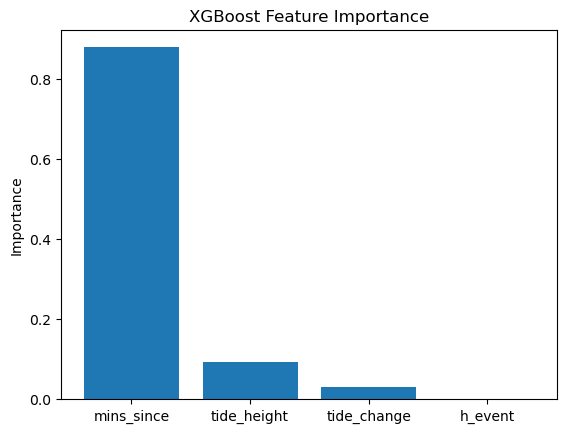

In [33]:
importances = xgb.feature_importances_
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feature_importance)

# Plot
plt.bar(feature_importance["Feature"], feature_importance["Importance"])
plt.ylabel("Importance")
plt.title("XGBoost Feature Importance")
plt.show()